In [5]:
# Установка необходимых пакетов
!pip install blocksnet ipykernel -q
!pip install folium matplotlib mapclassify
!pip install osmnx networkx ipykernel -q
!pip install mapclassify -q
!pip install iduedu
!pip install momepy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\meles\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\meles\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\meles\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\meles\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\meles\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\meles\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
# Импорт библиотек
import geopandas as gpd
import pandas as pd
import numpy as np
import networkx as nx
import momepy
from shapely.geometry import Point, Polygon, LineString
from blocksnet import BlocksGenerator, BlocksSplitter, AccessibilityProcessor

C:\Users\meles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# Загрузка данных
boundary = r'D:\ИТМО 2\НИР 3\dath\data_path2.1\boundary.geojson'
territory= r'D:\ИТМО 2\НИР 3\dath\data_path2.1\territory.geojson'
roads= r'D:\ИТМО 2\НИР 3\dath\data_path2.1\roads.geojson'
roads_inside= r'D:\ИТМО 2\НИР 3\dath\data_path2.1\roads_inside.geojson'
railways = r'D:\ИТМО 2\НИР 3\dath\data_path2.1\railways.geojson'
#water = r'D:\ИТМО 2\НИР 3\dath\data_path\water.geojson'
buildings= r'D:\ИТМО 2\НИР 3\dath\data_path2.1\buildings.geojson'


In [14]:
# Загружаем данные
boundary = gpd.read_file(boundary)
if boundary.crs != "EPSG:3857":
      boundary = boundary.to_crs("EPSG:3857")

territory = gpd.read_file(territory)
if territory.crs != "EPSG:3857":
      territory = territory.to_crs("EPSG:3857")

roads = gpd.read_file(roads)
if roads.crs != "EPSG:3857":
      roads = roads.to_crs("EPSG:3857")


roads_inside = gpd.read_file(roads_inside)
if roads_inside.crs != "EPSG:3857":
      roads_inside = roads_inside.to_crs("EPSG:3857")


railways = gpd.read_file(railways)
if railways.crs != "EPSG:3857":
      railways = railways.to_crs("EPSG:3857")

buildings = gpd.read_file(buildings)
if buildings.crs != "EPSG:3857":
      buildings = buildings.to_crs("EPSG:3857")


In [15]:
# Обработка дорог
roads = roads[roads.geom_type.isin(['LineString', 'MultiLineString'])]

GAP_TOLERANCE = 1

def _get_roads(roads):
    """Обработка и объединение дорожной сети"""
    merged = roads.unary_union
    if merged.geom_type == 'MultiLineString':
        roads = gpd.GeoDataFrame(geometry=list(merged.geoms), crs=roads.crs)
    else:
        roads = gpd.GeoDataFrame(geometry=[merged], crs=roads.crs)
    
    roads = roads.explode(index_parts=False).reset_index(drop=True)
    roads.geometry = momepy.close_gaps(roads, GAP_TOLERANCE)
    roads = roads[roads.geom_type.isin(['LineString'])]
    return roads

roads = _get_roads(roads)

In [16]:
# Генерация блоков
bg = BlocksGenerator(boundary, roads, railways)
blocks = bg.run()

2025-04-23 21:47:22.894 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:99 - Check boundaries schema
2025-04-23 21:47:23.126 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:103 - Check roads schema
2025-04-23 21:47:23.138 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:109 - Check railways schema
2025-04-23 21:47:23.147 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:115 - Check water schema
2025-04-23 21:47:23.153 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:124 - Exclude water objects
C:\Users\meles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\blocksnet\preprocessing\blocks_generator.py:125: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  line_water = water[water.geom_type != "LineString"].unary_union
2025-04-23 21:47:23.183 | INFO   

In [17]:
# Обработка зданий
buildings.geometry = buildings.representative_point()

In [18]:
# Разделение блоков по зданиям
bs = BlocksSplitter(blocks, buildings)
splitted_blocks = bs.run()

2025-04-23 21:47:23.808 | INFO     | blocksnet.preprocessing.blocks_splitter:run:167 - Joining buildings and blocks to exclude duplicates
2025-04-23 21:47:23.844 | INFO     | blocksnet.preprocessing.blocks_splitter:run:176 - Choosing blocks to be splitted
2025-04-23 21:47:23.884 | INFO     | blocksnet.preprocessing.blocks_splitter:run:185 - Splitting filtered blocks
100%|██████████| 9/9 [00:05<00:00,  1.54it/s]


In [19]:
print(f"Количество блоков до и после разделения: {len(blocks)}, {len(splitted_blocks)}")

Количество блоков до и после разделения: 520, 548


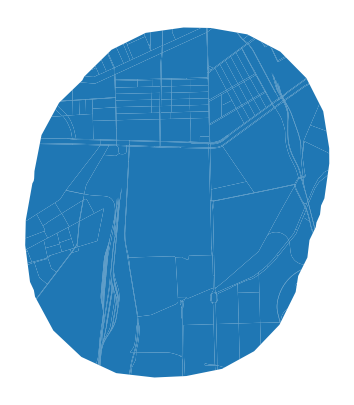

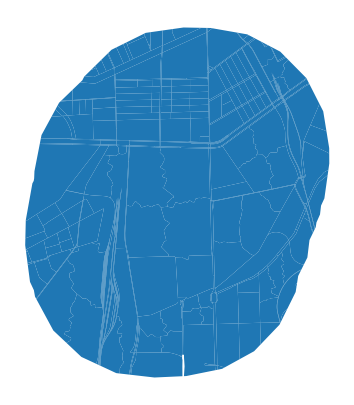

In [20]:
blocks.plot(linewidth=0.1, figsize=(5,5)).set_axis_off()
splitted_blocks.plot(linewidth=0.1, figsize=(5,5)).set_axis_off()
splitted_blocks.to_file('blocks.geojson')

In [21]:
# Анализ доступности
CRS = 32636
SPEED_M_MIN = 1000

def _roads_to_graph(roads):
    """Преобразование дорог в граф"""
    graph = momepy.gdf_to_nx(roads)
    graph.graph['crs'] = roads.crs.to_epsg()
    graph = nx.DiGraph(graph)
    
    for _, _, data in graph.edges(data=True):
        geometry = data['geometry']
        data['time_min'] = geometry.length / SPEED_M_MIN
        
    for n, data in graph.nodes(data=True):
        graph.nodes[n]['x'] = n[0]  # X координата
        graph.nodes[n]['y'] = n[1]  # Y координата

    return graph

roads_G = _roads_to_graph(roads)
AccessibilityProcessor._fix_graph(roads_G)

In [22]:
# Расчет матрицы доступности
ap = AccessibilityProcessor(blocks)
acc_mx = ap.get_accessibility_matrix(roads_G)
acc_mx.head()  # вывод первых 5 строк матрицы доступности

,0,1,2,3,4,5,6,7,8,9,...,510,511,512,513,514,515,516,517,518,519
0,0.000000,0.369385,6.199219,6.199219,1.850586,1.620117,1.082031,2.125000,2.398438,2.119141,...,8.632812,4.261719,4.539062,4.261719,4.261719,4.261719,4.539062,4.261719,4.656250,4.261719
1,0.369385,0.000000,6.207031,6.207031,1.860352,1.630859,1.091797,2.134766,2.408203,2.128906,...,8.640625,4.269531,4.550781,4.269531,4.269531,4.269531,4.550781,4.269531,4.664062,4.269531
2,6.199219,6.207031,0.000000,0.000000,6.152344,5.691406,5.515625,7.148438,7.421875,4.675781,...,3.179688,5.457031,5.738281,5.457031,5.457031,5.457031,5.738281,5.457031,5.851562,5.457031
3,6.199219,6.207031,0.000000,0.000000,6.152344,5.691406,5.515625,7.148438,7.421875,4.675781,...,3.179688,5.457031,5.738281,5.457031,5.457031,5.457031,5.738281,5.457031,5.851562,5.457031
4,1.850586,1.860352,6.152344,6.152344,0.000000,0.486328,0.786621,1.313477,1.586914,2.076172,...,8.585938,3.980469,4.289062,3.980469,3.980469,3.980469,4.289062,3.980469,4.402344,3.980469


In [23]:
from blocksnet.models import City
from blocksnet import Accessibility, Connectivity

blocks['land_use'] = None

city = City(
    blocks=blocks,
    acc_mx=acc_mx
)

connectivity = Connectivity(city_model=city)
connectivity_result = connectivity.calculate()
connectivity_result

,geometry,connectivity
id,,
0,"POLYGON ((3372221.049 8381344.575, 3372211.487...",5.265625
1,"POLYGON ((3372088.305 8381285.601, 3372088.309...",5.273438
2,"POLYGON ((3370506.484 8376860.644, 3370484.031...",7.589844
3,"POLYGON ((3370482.486 8376847.053, 3370484.031...",7.589844
4,"POLYGON ((3373604.584 8380878.791, 3373501.869...",4.000000
...,...,...
515,"POLYGON ((3372784.704 8377975.045, 3372774.775...",5.000000
516,"POLYGON ((3372774.775 8377925.232, 3372784.704...",5.179688
517,"POLYGON ((3372786.341 8377787.095, 3372788.055...",5.000000


In [24]:
connectivity_result.explore()

In [25]:
from blocksnet.models import City
blocks['land_use'] = None
city = City(
    blocks=blocks,
    acc_mx=acc_mx
)

Доступность

In [39]:
from blocksnet import Accessibility, Connectivity
accessibility = Accessibility(city_model=city)
block = city[159] # квартал от которого будем считать доступность
result = accessibility.calculate(block)
#Accessibility.plot(result, linewidth=0.9, figsize=(30,15))


In [40]:
block

Block(id=159, geometry=<POLYGON ((3374179.393 8376657.874, 3374172.881 8376668.572, 3374164.153 837...>, land_use=None, buildings=[], services=[], city=<blocksnet.models.city.City object at 0x000002228C618ED0>)

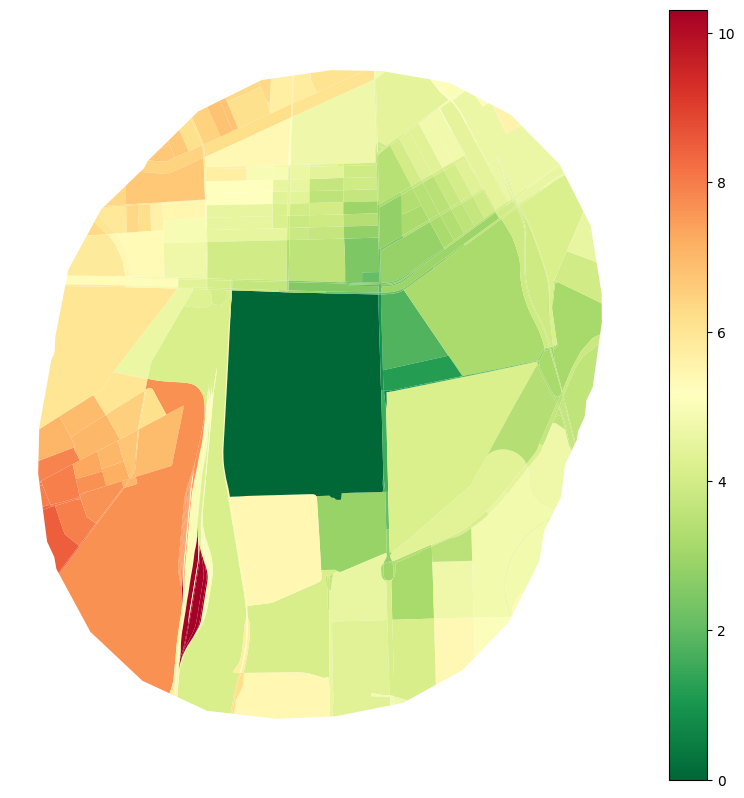

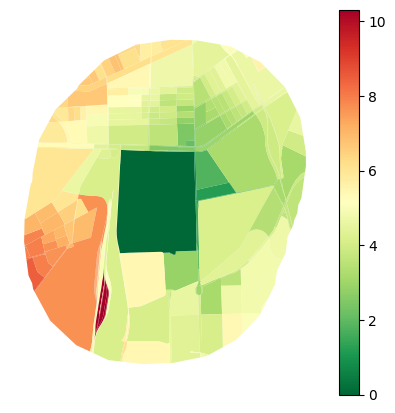

In [41]:
result.plot(column='accessibility_from', legend=True, figsize=(10,10), cmap='RdYlGn_r').set_axis_off()
result.plot(column='accessibility_to', legend=True, figsize=(5,5), cmap='RdYlGn_r').set_axis_off()

In [42]:
# Пример DataFrame с кварталами и значениями доступности
data = result

# Создаем DataFrame
df = pd.DataFrame(data)

# Рассчитываем среднее и медиану для каждого атрибута
mean_to = df['accessibility_to'].mean()
median_to = df['accessibility_to'].median()

mean_from = df['accessibility_from'].mean()
median_from = df['accessibility_from'].median()

# Добавляем столбцы с нормализованными значениями
df['accessibility_to_normalized'] = (df['accessibility_to'] - df['accessibility_to'].min()) / (df['accessibility_to'].max() - df['accessibility_to'].min())
df['accessibility_from_normalized'] = (df['accessibility_from'] - df['accessibility_from'].min()) / (df['accessibility_from'].max() - df['accessibility_from'].min())

# Выводим результаты
print(f"Среднее значение доступности 'to': {mean_to:.2f}")
print(f"Медиана доступности 'to': {median_to:.2f}")
print(f"Среднее значение доступности 'from': {mean_from:.2f}")
print(f"Медиана доступности 'from': {median_from:.2f}")

Среднее значение доступности 'to': 4.59
Медиана доступности 'to': 4.38
Среднее значение доступности 'from': 4.59
Медиана доступности 'from': 4.38


Связанность

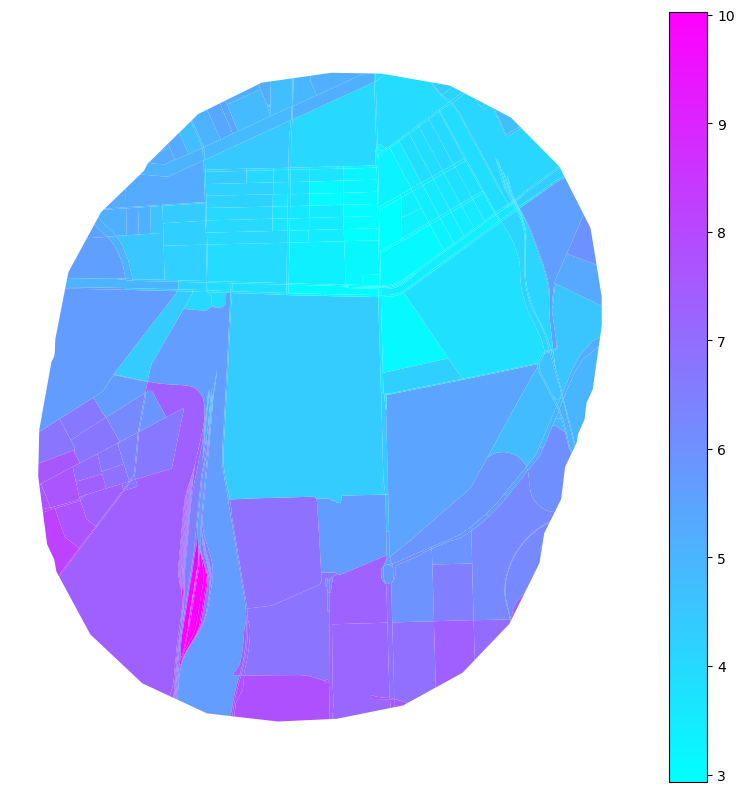

In [43]:
connectivity = Connectivity(city_model=city)
connectivity_result = connectivity.calculate()
Connectivity.plot(connectivity_result, linewidth=0.9, figsize=(10,10))

In [44]:
dff = pd.DataFrame(connectivity_result)
stats = dff['connectivity'].agg(['mean', 'median'])
mean_to = dff['connectivity'].mean()
median_to = dff['connectivity'].median()
# Добавляем столбцы с нормализованными значениями
dff['connectivity_to_normalized'] = (dff['connectivity'] - dff['connectivity'].min()) / (dff['connectivity'].max() - dff['connectivity'].min())

# Выводим результаты
print(f"Среднее значение связанности: {mean_to:.2f}")
print(f"Медиана связанности: {median_to:.2f}")

Среднее значение связанности: 4.82
Медиана связанности: 4.31


Площадь кварталов

или может быть посчитать только площадь территории?

In [45]:
blocks_area = gpd.clip(blocks, territory)

In [46]:
if blocks_area.crs != "EPSG:3857":
      blocks_area = blocks_area.to_crs("EPSG:3857")

In [47]:
def calculate_average_block_size(blocks_area):

    blocks_area['block_size'] = blocks_area.geometry.area
    filtered_blocks = blocks_area[blocks_area['block_size'] >= 1000]
    if filtered_blocks.empty:
        raise ValueError("Нет кварталов с площадью >= 1000 м² для расчета.")
    return filtered_blocks['block_size'].mean()

try:
    average_block_size = calculate_average_block_size(blocks_area)
    average_block_size_ha = average_block_size / 10_000
    print(f"Средняя площадь квартала: {average_block_size:.2f} м² ({average_block_size_ha:.2f} га)")
except ValueError as e:
    print(e)

Средняя площадь квартала: 1231529.70 м² (123.15 га)


Плотность УДС

In [48]:
def street_density(roads_inside, territory):
    """Плотность улиц (км/км²)"""
    roads_inside = roads_inside.to_crs(territory.crs) if roads_inside.crs != territory.crs else roads_inside
    return (roads_inside.geometry.length.sum() / 1000) / (territory.geometry.area.sum() / 1e6)

# Пример вызова
print(f"Плотность удс: {street_density(roads_inside, territory):.2f} км/км²")

Плотность удс: 0.00 км/км²
